# Boston Crime Data

> The following report examines crime incident reports provided by the Boston Police Department's new crime incident report system for the years 2015 to 2018. The data set documents the initial details surrounding an incident to which BPD officers respond, focused on capturing the type of incident as well as when and where it occurred. Time of day (in hours), location (latitude and longitude), day of the week, crime type, as well as some user generated statistics, like 'gun crime radius' and 'gun crime distance' will be used in the analysis. All data made available by Kaggle, provided by Analyze Boston.

***
In the fallout of recent mass shootings and what seem like daily news reports of gun related tragedies, gun violence, and how best to stop or reduce it, has been a lightning rod of American political discourse. With this data set, I aim to explore the city of Boston, as a microcosm of a greater national concern, and the areas inside of the city where gun crime is most prevalent; emphasis on shootings and gun-related homicides in particular. I will examine which parts of Boston, relative to the downtown Boston area, present the greatest risks of potential gun violence and towards which areas, *or whether or not*, gun activity is migrating within Boston. I will also examine which time of the day, days of the week, and months of the year gun violence is most likely to occur. The following report could serve as:
- an advisory to cautious travelers and Boston residents
- a precursor to future examinations from the crime incident report system, when it acquires more years of data
- predictive analysis for any organizations or law enforcement agencies wishing to tackle gun violence in the city
- a complement to data sets that explore various statistics for the city of Boston
- a template for similar examinations on the state or national level

With this report, I aim to answer where, geographically, gun crime is most prevalent in Boston, when it's most prevalent, and most importantly, to provide some clarity on the predictability of the 'when' and 'where' of gun violence, from year to year. We begin with summary statistics for out data set.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpi

# In order to hide pink warning text boxes
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading our data file
crime = pd.read_csv('crime.csv', engine='python')

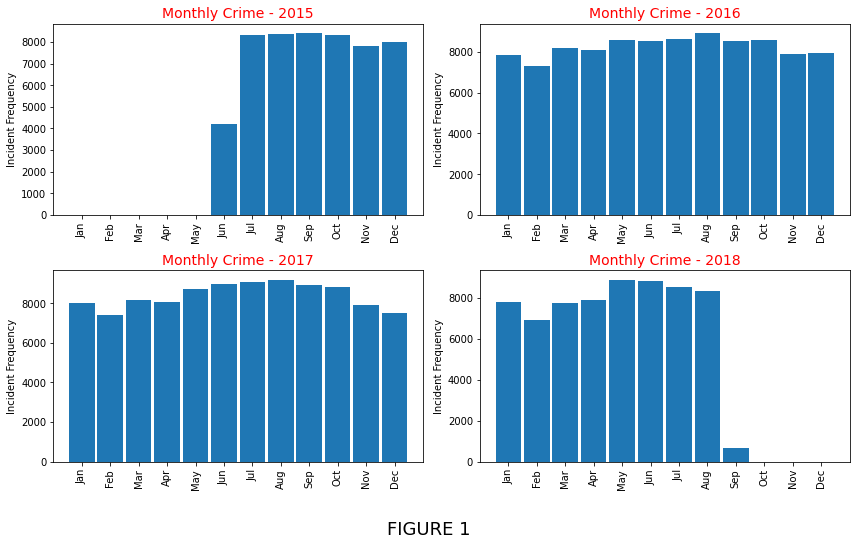

In [2]:
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

plt.figure(figsize=(12,7))
plt.suptitle('\nFIGURE 1', y=0, size=18)

plt.subplot(2,2,1)
plt.hist(x=crime['MONTH'][crime['YEAR']==2015], bins=np.arange(14)-0.5, rwidth=.9)
plt.xlim(0,13)
plt.xticks(range(1, 13), months, rotation='vertical')
plt.ylabel('Incident Frequency')
plt.title('Monthly Crime - 2015', color='r', size=14)

plt.subplot(2,2,2)
plt.hist(x=crime['MONTH'][crime['YEAR']==2016], bins=np.arange(14)-0.5, rwidth=.9)
plt.xlim(0,13)
plt.xticks(range(1, 13), months, rotation='vertical')
plt.ylabel('Incident Frequency')
plt.title('Monthly Crime - 2016', color='r', size=14)

plt.subplot(2,2,3)
plt.hist(x=crime['MONTH'][crime['YEAR']==2017], bins=np.arange(14)-0.5, rwidth=.9)
plt.xlim(0,13)
plt.xticks(range(1, 13), months, rotation='vertical')
plt.ylabel('Incident Frequency')
plt.title('Monthly Crime - 2017', color='r', size=14)

plt.subplot(2,2,4)
plt.hist(x=crime['MONTH'][crime['YEAR']==2018], bins=np.arange(14)-0.5, rwidth=.9)
plt.xlim(0,13)
plt.xticks(range(1, 13), months, rotation='vertical')
plt.ylabel('Incident Frequency')
plt.title('Monthly Crime - 2018', color='r', size=14)

plt.tight_layout()
plt.show()

After plotting some yearly incident graphs, we can see from _FIGURE 1_ that the data for years 2015 and 2018 have not been collected over the course of an entire year. As a result, moving forward, I will only be using data for the complete years of 2016 and 2017 in my analysis, as the months June through September are the only months represented in all four years worth of data, thus rendering them over-represented in this data set.

After formatting our data set so that it only includes crime incidents occurring in the years 2015 and 2018, we can now gain an intuitive idea of the prevalence of overall crime, and gun crime specifically, in the city of Boston for the years 2016 and 2017. Let's take a look at a scatter plot where each crime incident has been plotted according to the geographic location of where it occurred.

In [3]:
############################
####### DATA CLEANING ######
############################

#Creating a query, limiting our crime datas to the desired latitude/longitudal coordinates

crime = crime[(crime['Lat'] > 42.225) & (crime['Lat'] < 42.4)]
crime = crime[(crime['Long']> -71.2) & (crime['Long'] < -70.95)]

# Removing the crime data for the incomplete years
crime = crime[crime['YEAR']!=2018]
crime = crime[crime['YEAR']!=2015]

# Partitioning our data into the applicable crimes of interest
homicide = crime['OFFENSE_CODE_GROUP']=='Homicide'
shooting = crime['SHOOTING']=='Y'

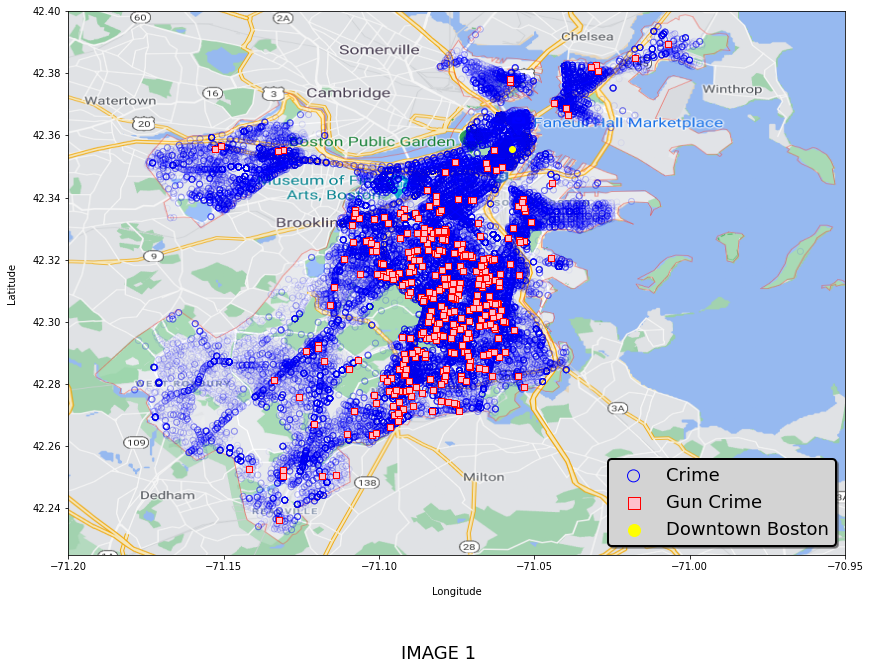

In [4]:
# Uploading the underlying Boston map used in map plotting
image = mpi.imread('Boston_map.png')

# Establishing downtown Boston's geographic coordinates
downtown_lat = 42.3557
downtown_long = -71.0572

plt.figure(figsize=(20,10))
plt.suptitle('IMAGE 1', y=0, size=18)

# Plot crime events on geographic coordinates
plt.imshow(image, extent=[-71.234864, -70.905343, 42.216068, 42.415250])
plt.scatter(x=crime[~shooting]['Long'], y=crime[~shooting]['Lat'], facecolors='none', edgecolors='b', alpha=.05)
plt.scatter(x=crime[shooting]['Long'], y=crime[shooting]['Lat'], color='pink', edgecolors='r', marker='s')
plt.scatter(downtown_long,downtown_lat, marker='o', color='yellow')
plt.xlim(-71.2, -70.95)
plt.ylim(42.225, 42.4)
plt.xlabel('\nLongitude')
plt.ylabel('Latitude\n')

# Legend beautification
leg = plt.legend(['Crime','Gun Crime','Downtown Boston'],fontsize=18, loc='lower right', 
                 markerscale=2, framealpha=1, facecolor='lightgrey', edgecolor='k', shadow=True)

leg.get_frame().set_linewidth(2)

# Darken the legend symbol for 'Crime'
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.show()

## Crime Prevalence

Visually, from *IMAGE 1*, we can see that gun related crimes seem to cluster midway between the northern and southern parts of Boston as well as in the east. Overall crime incidents seem to be distributed far more evenly around the entire city while clustering in central and northern Boston. In the most northeastern part of the city, directly southwest of Winthrop, all crime incidents are infrequent. 

Notice that gun crime incidents correlate with overall crime incidents, that is, the areas in which our blue points cluster are the same areas where our pink points are also most prevalent. The lack of both crime incident and gun crime incidents in the green, forested areas implies that crime most likely correlates to population density.

In order to understand approximately how far crimes are taking place from downtown Boston area, I centralized downtown Boston at the origin of the following plots and graphs then converted latitudinal and longitudinal degrees into miles. Latitude-to-mile conversion stays consistent at approximately 69 miles per latitudinal degree since the difference between latitudes remains constant as we move further from the equator and closer to the poles. However, longitude is widest as the equator while converging to a distance of zero miles between longitudes as we approach the poles from the equator. Without getting too math heavy, there is a formula that accomplishes this for us:

- 1° of longitude $=$ $cos$(latitude in radians) $*$ 69.172 miles

According to Google Maps, downtown Boston is centrally located at 42.3557° N, 71.0572° W, near the intersection of Devonshire St. and Franklin St. These will be the coordinates we use to centralize our plots and the latitude we use to approximate our longitude-to-miles conversion (51.12 miles per longitudinal degree).

In [5]:
###############   Distance function   ###################

def distance(x, y, x0=0, y0=0):
    '''Compute distance between two dimensional vectors
    >>> distance(x=3, y=4)
    5.0
    '''
    return np.sqrt((x-x0)**2 + (y-y0)**2)

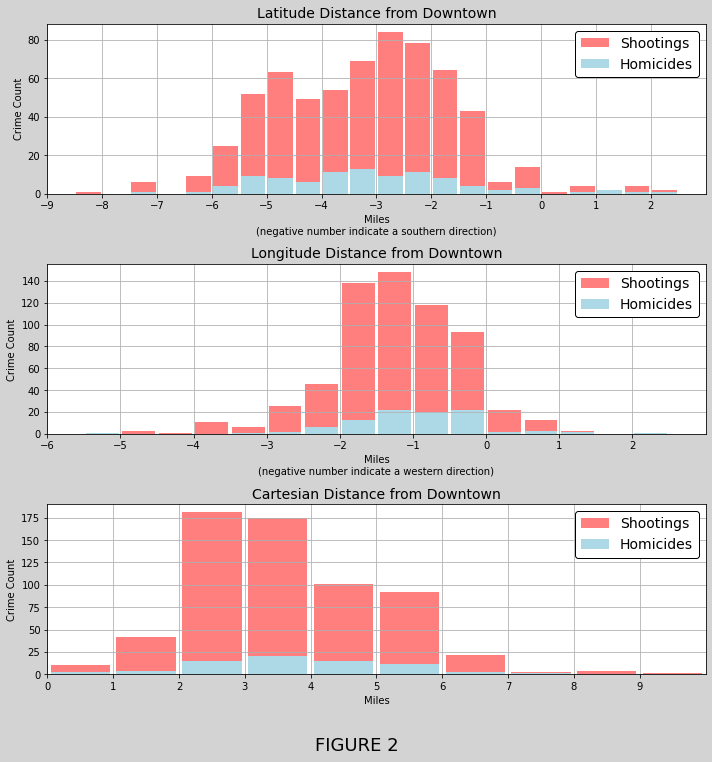

In [6]:
# Changing geographic coordinates to reflect downtown as the central location/origin

crime['Centered_Lat'] = crime['Lat'] - downtown_lat
crime['Centered_Long'] = crime['Long'] - downtown_long
crime['Centered_Lat_Miles'] = crime['Centered_Lat'] * 69
crime['Centered_Long_Miles'] = crime['Centered_Long'] * 51.12

# Call the distance() function with downtown, now centralized at (0,0), as the (x0,y0) location
crime['Radius_miles'] = distance(crime['Centered_Long_Miles'],crime['Centered_Lat_Miles'],0,0)

plt.figure(figsize=(10, 10), facecolor='lightgrey')
plt.suptitle('\nFIGURE 2', y=0, size=18)

plt.subplot(3,1,1)
ax = crime['Centered_Lat_Miles'][shooting].hist(grid=True, alpha=.5, color='r', rwidth=.9, bins=np.arange(-9,4,.5))
crime['Centered_Lat_Miles'][homicide].hist(ax=ax, color='lightblue', rwidth=.9, bins=np.arange(-9,4,.5))
plt.title('Latitude Distance from Downtown', size=14)
plt.xlim(-9,3)
plt.xticks(np.arange(-9,3,1))
plt.xlabel('Miles\n(negative number indicate a southern direction)')
plt.ylabel('Crime Count')
leg = plt.legend(['Shootings','Homicides'], fontsize=14, loc='upper right', framealpha=1)
leg.get_frame().set_edgecolor('black')

plt.subplot(3,1,2)
ax = crime['Centered_Long_Miles'][shooting].hist(grid=True, alpha=.5, color='r', rwidth=.9, bins=np.arange(-6,3,.5))
crime['Centered_Long_Miles'][homicide].hist(ax=ax, color='lightblue', rwidth=.9, bins=np.arange(-6,3,.5))
plt.title('Longitude Distance from Downtown', size=14)
plt.xlim(-6,3)
plt.xticks(np.arange(-6,3,1))
plt.xlabel('Miles\n(negative number indicate a western direction)')
plt.ylabel('Crime Count')
leg = plt.legend(['Shootings','Homicides'], fontsize=14, loc='upper right', framealpha=1)
leg.get_frame().set_edgecolor('black')

plt.subplot(3,1,3)
ax = crime['Radius_miles'][shooting].hist(alpha=.5, color='r', rwidth=.9, bins=np.arange(11))
crime['Radius_miles'][shooting][homicide].hist(ax=ax, color='lightblue', rwidth=.9, bins=np.arange(11))
plt.title('Cartesian Distance from Downtown', size=14)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.xlabel('Miles')
plt.ylabel('Crime Count')
leg = plt.legend(['Shootings','Homicides'], fontsize=14, loc='upper right', framealpha=1)
leg.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()

## Crime Distance

*FIGURE 2* confirms what we could already see from *IMAGE 1* above. However, now we know approximately how far the gun violence hot spots are from downtown Boston. It's from about one mile to about five or six miles south of downtown Boston that gun violence is the most prevalent, with about three miles south being the latitude of peak activity. We can also see that the bulk of gun violence occurs within two miles west of downtown Boston's longitude.

The Cartesian distance can be thought of as the 'true' distance from downtown Boston in which most gun violence occurs.  Each bin in the Cartesian histogram represents a ring, the inner and outer radius of which correspond with the lower and upper bounds of each bin, ie. each ring is a mile wide. Since each bin represents a geographical ring with ever increasing area, we have an ever increasing ratio of area to gun violence events. So although the radius is helpful in determining the distance of crimes, the prevalence of crimes might be skewed since a larger gun violence count could simply be accounted for by the larger area encapsulated by the ring. That being said, the Cartesian graph doesn't assign the largest gun violence counts to the outermost rings, therefore, we still have confirmation that gun violence is still clustered at most within a four mile radius.

With this information, outreach programs can focus their efforts to the parts of the city that fall within their desired proximity of downtown. Law enforcement could use this information to focus their patrol or surveillance efforts in strategically advantageous proximity as well.

In [7]:
# Determing the geographic coordinates of 'Crime Central' (in the Washington Park Neighborhood)
cc_lat = crime['Lat'].mean()
cc_long = crime['Long'].mean()
# Coordinates for 'Homicide Central' in the Dudley/Bruswick King neighborhood
hc_lat = crime['Lat'][crime['OFFENSE_CODE_GROUP']=='Homicide'].mean()
hc_long = crime['Long'][crime['OFFENSE_CODE_GROUP']=='Homicide'].mean()
hc_lat_std = crime['Lat'][crime['OFFENSE_CODE_GROUP']=='Homicide'].std()
hc_long_std = crime['Long'][crime['OFFENSE_CODE_GROUP']=='Homicide'].std()
# CC for each year respectively
cc_lat_2016 = crime['Lat'][crime['YEAR']==2016].mean() #Kensington Park
cc_long_2016 = crime['Long'][crime['YEAR']==2016].mean()
cc_lat_2017 = crime['Lat'][crime['YEAR']==2017].mean()# Kensington park
cc_long_2017 = crime['Long'][crime['YEAR']==2017].mean()
# HC for each year respectively
hc_lat_2016 = crime['Lat'][crime['OFFENSE_CODE_GROUP']=='Homicide'][crime['YEAR']==2016].mean()
hc_long_2016 = crime['Long'][crime['OFFENSE_CODE_GROUP']=='Homicide'][crime['YEAR']==2016].mean()
hc_lat_2017 = crime['Lat'][crime['OFFENSE_CODE_GROUP']=='Homicide'][crime['YEAR']==2017].mean()
hc_long_2017 = crime['Long'][crime['OFFENSE_CODE_GROUP']=='Homicide'][crime['YEAR']==2017].mean()

In [8]:
print(f"Crime Central coordinates:\n {cc_lat,cc_long}")
print(f"Homicide Central Coordinates:\n {hc_lat,hc_long}")
print("Crime Central migration coordinates:\n", f"2016: {cc_lat_2016,cc_long_2016},", f"2017: {cc_lat_2017,cc_long_2017}")
print("Homicide Central migration coordinates:\n",f"2016: {hc_lat_2016,hc_long_2016},", f"2017: {hc_lat_2017,hc_long_2017}")

Crime Central coordinates:
 (42.322205858019316, -71.08293213699484)
Homicide Central Coordinates:
 (42.31042703431579, -71.07607974399998)
Crime Central migration coordinates:
 2016: (42.32215614443702, -71.08286816380131), 2017: (42.32225465500245, -71.08299493067621)
Homicide Central migration coordinates:
 2016: (42.30989473044445, -71.07605232955555), 2017: (42.3109061078, -71.076104417)


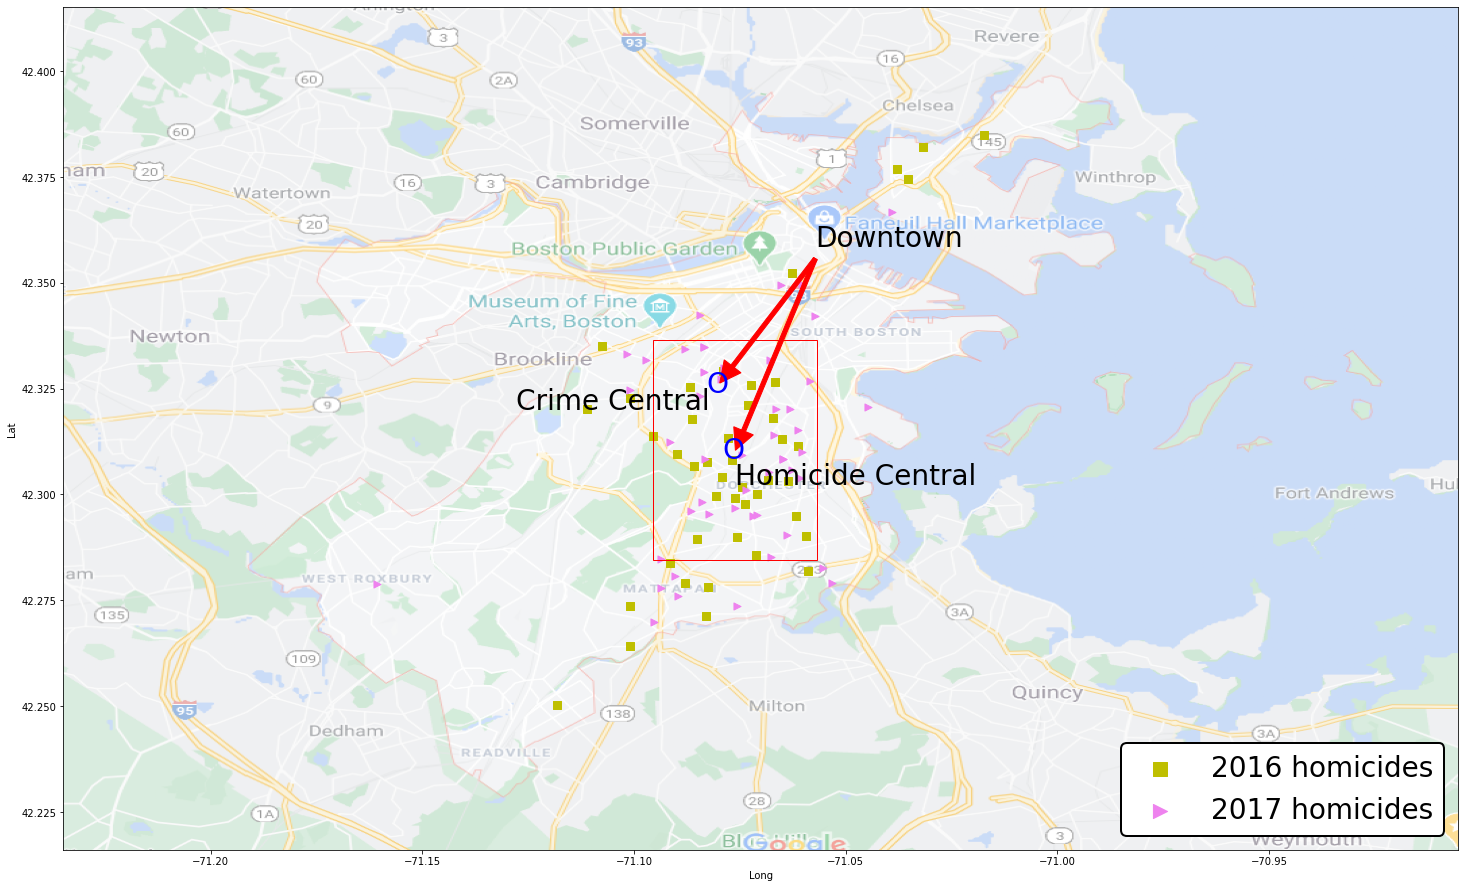

In [9]:
# Import the patches that allow drawing the rectangle
import matplotlib.patches as patches

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

# set origin points
a = [downtown_long,downtown_lat]
b = [hc_long,hc_lat]
c = [cc_long, cc_lat]

head_length = 0.005

# determine the x and y distances between downtown and HC/CC central origins
dx = b[0] - a[0]
dy = b[1] - a[1]
dz = c[1] - a[1]
dw = c[0] - a[0]

# Determine vector magnitude
vec_ab_magnitude = np.sqrt(dx**2+dy**2)
vec_ac_magnitude = np.sqrt(dw**2+dz**2)


dx = dx / vec_ab_magnitude
dy = dy / vec_ab_magnitude
dw = dw / vec_ab_magnitude
dz = dz / vec_ab_magnitude

vec_ab_magnitude = vec_ab_magnitude - head_length
vec_ac_magnitude = vec_ac_magnitude - head_length

ax = crime[homicide][crime['YEAR']==2016].plot(kind='scatter', x='Long', y='Lat', color='y', marker='s', s=50)
plt.imshow(image, extent=[-71.234864, -70.905343, 42.216068, 42.415250], alpha=.5)
crime[homicide][crime['YEAR']==2017].plot(kind='scatter', ax=ax, x='Long', y='Lat', color='violet', s=50, marker='>')

# adjust vector magnitudes to account for headlength of the vector arrow
ax.arrow(a[0], a[1], vec_ab_magnitude*dx, vec_ab_magnitude*dy, head_width=0.005, head_length=0.005, fc='r', ec='r')
ax.arrow(a[0], a[1], vec_ac_magnitude*dw, vec_ac_magnitude*dz, head_width=0.005, head_length=0.005, fc='r', ec='r')
ax.annotate('Downtown', (a[0],a[1]+.003),fontsize=28)
ax.annotate('Homicide Central', (b[0],b[1]-0.008), fontsize=28)
ax.annotate('Crime Central', (c[0]-.045,c[1]-.002),fontsize=28)
ax.annotate('O', (b[0]-.003,b[1]-.002), color='b', fontsize=28)
ax.annotate('O', (c[0],c[1]+.002), color='b', fontsize=28)

# Legend beautification
leg = plt.legend(['2016 homicides','2017 homicides'], fontsize=28, loc='lower right', markerscale=2, framealpha=1)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2)

# Create a Rectangle patch
rect = patches.Rectangle((hc_long - hc_long_std, hc_lat - hc_lat_std), 2*hc_long_std, 2*hc_lat_std, linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

## Central Tendency of Crime and Homicide Coordinates

With a data set like that compiled by the BPD's crime incident report system, mean latitudes and mean longitudes for specific crimes can be plotted, and the distances between mean coordinates and various locales can be measured. For the purposes of this report, the central coordinates for overall crime, _Crime Central_ , and for homicides,  _Homicide Central_ , have been plotted to provide insight, visually, into how far from downtown homicides cluster, as well as just how far they cluster from each other. From our previous map plot, we could see that where crime incidents tend to clutter, so did shootings and homicides. With this plot, however, we can see that although crime and homicides have mean coordinates to the southwest of downtown Boston, there is a bit of divergence between the two. In the case of _Homicide Central_ , the distance and location is consistent with the distances and directions we discussed with _FIGURE 2_. It would appear that something else, in addition to overall crime, is influencing the geographic location of gun crime, and homicides in particular. Nonetheless, gun crime follows a trend which, even without knowing all of its causes, remains remarkably consistent from 2016 to 2017.

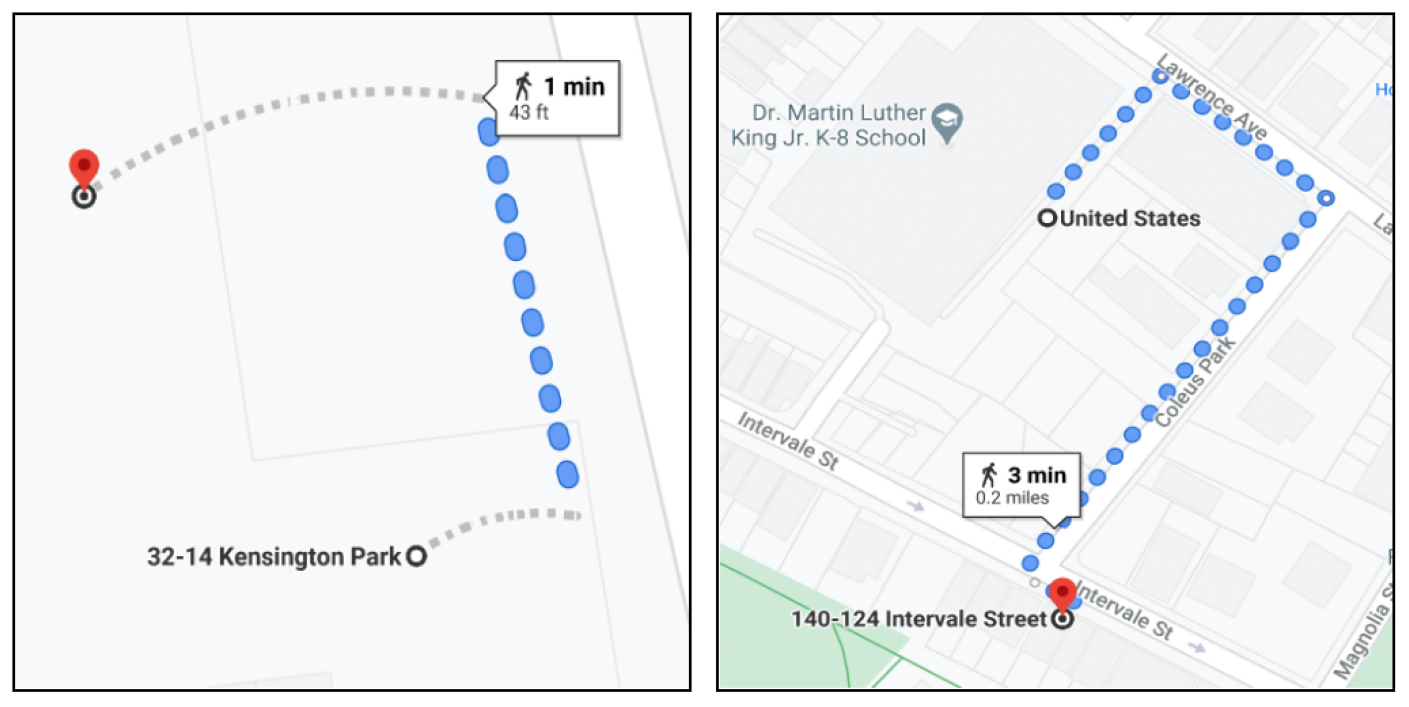

In [10]:
# Stylized images for creation of migrations.png, cut and pasted with screenshot cropped image. 
# To recreate, copy and paste the following in a markdown cell then crop combined images into new, single image

# <tr>
# <td><img src="crime_central_migration_2016_to_2017.png" alt="CC_migration" style="width:400px;height:400px;border:2px solid black;"/></td>
# <td><img src="homicide_central_migration_2016_to_2017.png" alt="HC_migration" style="width:400px;height:400px;border:2px solid black;"/></td>
# </tr>

# Uploading the migration images
image2 = mpi.imread('migrations.png')

plt.imshow(image2)
plt.axis('off')
plt.show()

## Central Tendency Migration

In the interest of gaining an even better grasp of which direction gun violence, and homicides in particular, is trending, we can analyze the yearly migration of the mean crime and mean homicide coordinates themselves.

Interestingly, when we plot the geographic coordinates for _Crime Central_ from 2016 and 2017, we find that the distance between the two is less than 40 feet apart in the Kensington Park neighborhood, according to Google maps (the image on the left). Perhaps this makes sense given the high quantity of crime incidents. As the number of crime incidents rises, we would expect their mean geographic coordinates to begin to display an ever-narrowing central tendency. What's remarkable, however, is that even with far less homicides recorded each year than total crime incidents, we still find that _Homicide Central_  (located in Boston's Dudley/Brunswick King neighborhood near the intersection of Intervale St. and Coleus Park), for 2016 is only 0.1 miles walking distance from 2017's _Homicide Central_ (image on the right). With only 45 (2016) and 50 (2017) homicides respectively, the short distance between each year's mean homicide coordinates is interesting to say the least. If crime and gun violence prevention groups knew that overall crime and homicides display proximal central tendencies each year, then, as stated before with the latitudinal and longitudinal coordinates, they could choose to strategically condense their outreach and prevention efforts, geographically, with some desired distance from crime and homicide central tendency coordinates.

_Homicide Central_ is located approximately 3 miles south and 1 mile west of downtown Boston can assume a normal distribution of homicides relative to _Homicide Central_ , which isn't far-fetched if we consider the distributions found above in _FIGURE 2_ around the 3 mile marker and 1 mile marker, for latitude and longitude respectively. With a latitudinal standard deviation of about 1.8 miles, and a longitudinal standard deviation of about one mile, we can draw a border around the rectangular space where approximately 68% of all homicides occur. We can see this area represented by the red rectangle shown above in the 'Central Tendencies' map. Granted the measurement is just a ballpark, but this information provides a more specific area of Boston where anti-gun violence measures can be focused and concentrated.

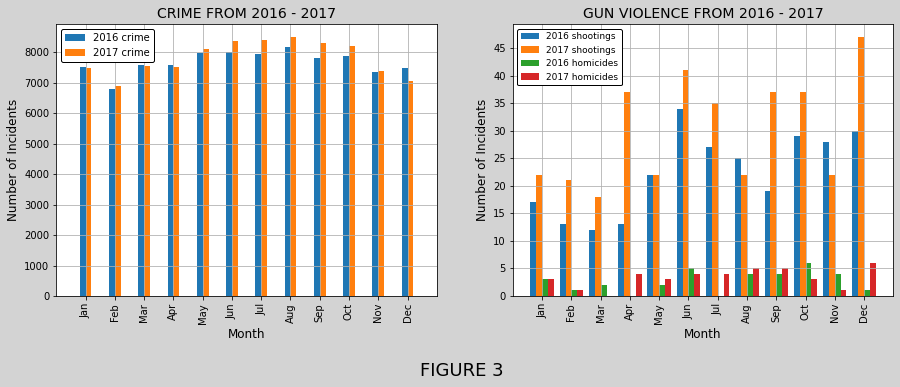

In [11]:
# Shooting and Homicides by year
shoot_2016 = crime[shooting][crime['YEAR']==2016]
hom_2016 = crime[shooting][homicide][crime['YEAR']==2016]
shoot_2017 = crime[shooting][crime['YEAR']==2017]
hom_2017 = crime[shooting][homicide][crime['YEAR']==2017]

# Yearly crime/gun crime histograms/bar charts
plt.figure(figsize=(15,5), facecolor='lightgrey')
plt.suptitle('\nFIGURE 3', y=0, size=18)

plt.subplot(1,2,1)
crime['MONTH'][crime['YEAR']==2016].hist(bins=np.arange(14)-0.6, rwidth=.2)
crime['MONTH'][crime['YEAR']==2017].hist(bins=np.arange(14)-0.4, rwidth=.2)
leg = plt.legend(['2016 crime','2017 crime'], framealpha=1)
leg.get_frame().set_edgecolor('black')
plt.xlim(0,13)
plt.xticks(np.arange(1,13,1), months, rotation='vertical')
plt.xlabel('Month', size=12)
plt.ylabel('Number of Incidents', size=12)
plt.title('CRIME FROM 2016 - 2017', size=14)

plt.subplot(1,2,2)
shoot_2016['MONTH'].hist(bins=np.arange(14)-.8, rwidth=.2)
shoot_2017['MONTH'].hist(bins=np.arange(14)-0.60, rwidth=.2)
hom_2016['MONTH'].hist(bins=np.arange(14)-0.4, rwidth=.2)
hom_2017['MONTH'].hist(bins=np.arange(14)-0.2, rwidth=.2)
leg = plt.legend(['2016 shootings','2017 shootings','2016 homicides','2017 homicides'],fontsize=9, framealpha=1)
leg.get_frame().set_edgecolor('black')
plt.xlim(0,13)
plt.xticks(np.arange(1,13,1), months, rotation='vertical')
plt.yticks(np.arange(0,50,5))
plt.xlabel('Month', size=12)
plt.ylabel('Number of Incidents', size=12)
plt.title('GUN VIOLENCE FROM 2016 - 2017', size=14)
plt.show()

## Crime Fluctuation

In examining the monthly crime fluctuations ( _FIGURE 3_ ), for both overall crime and gun crime, we can learn whether to expect a general increase or decrease in both from month to month. Although we see a noticeable uptick in overall crime from 2016 to 2017, especially during the months of May through October, the monthly distribution is consistent, with crime gradually increasing from February to August, before gradually dipping again. Gun crime seems to follow it's own monthly distribution that doesn't adhere to the same monthly fluctuations as overall crime, indicating that something else, other than crime itself, is having a significant influence on gun crime fluctuations, despite seeing an uptick in overall shootings just like we see with overall crime. For example, it's the month of April that sees the highest uptick in shootings from 2016 to 2017 despite seeing the second lowest number of shooting incidents in 2016 along with an overall decrease in crime from 2016 to 2017. Although the Boston Police Department's crime incident report system still in its infancy, more data, across more years could shed some light onto which year shows anomalous behavior for the month of April.

With gun crime, we can see that the 2017 fluctuations from month to month maintain the same upward and downward trends that they displayed in 2016, with the exceptions of April and September, indicating that there might be a correlation between weather and shootings, or perhaps holidays and shootings. Whatever the actual cause(s), the fluctuations in shootings seems to follow a seasonal distribution.  If so, seasonal outreach measures might make sense for anti-gun violence organizations as such information could be used to align their counter-violence measures with when gun violence is at its peak.

Interestingly, these upticks in shootings don't seem to be predictive of a similar uptick in homicides, themselves, let alone in regards to monthly distribution. Although shootings increased over 34% from 269 shootings in 2016 to 361 shootings in 2017, this led to an increase in homicides of only about 11% (45 homicides in 2016 to 50 homicides in 2017).

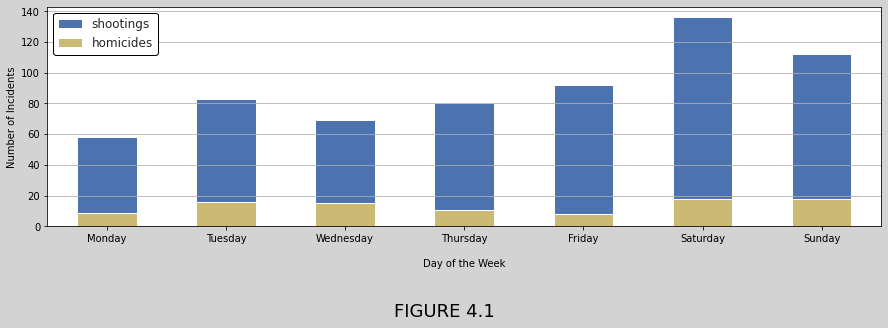

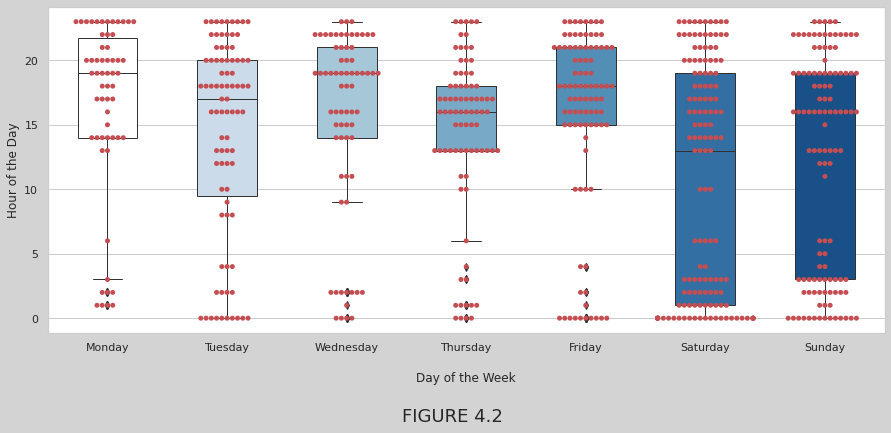

In [12]:
# Import the Seaborn data visualization library 
import seaborn as sns

plt.figure(figsize=(12.5, 4),facecolor='lightgrey')

plt.subplot()
plt.suptitle('\nFIGURE 4.1', y=0, size=18)

sns.set(style="whitegrid")
days = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
crime[shooting]['DAY_OF_WEEK'].value_counts().reindex(days, fill_value=0).plot.bar()
crime[homicide]['DAY_OF_WEEK'].value_counts().reindex(days, fill_value=0).plot.bar(color='y')
plt.xticks(range(0, 7), days, rotation='horizontal')
plt.xlabel('\nDay of the Week')
plt.ylabel('Number of Incidents')
plt.grid(axis='x')
leg = plt.legend(['shootings','homicides'],fontsize=12, framealpha=1)
leg.get_frame().set_edgecolor('black')

plt.tight_layout()
plt.show()

# Reindex the crime df data into chronological days of the week by first:
# 1) making the 'DAY_OF_WEEK' column categorical and then
# 2) specifying the ordering we're going to use

crime['DAY_OF_WEEK'] = pd.Categorical(crime['DAY_OF_WEEK'], days)
crime = crime.sort_values('DAY_OF_WEEK')

plt.subplots(figsize=(15,6), facecolor='lightgrey')
plt.suptitle('\nFIGURE 4.2', y=0, size=18)

sns.set(style="whitegrid")
ax = sns.swarmplot(x="DAY_OF_WEEK", y="HOUR", data=crime[shooting], color='r')
sns.boxplot(x="DAY_OF_WEEK", y="HOUR", data=crime[shooting], palette="Blues", linewidth= 1, width=.5)
box = ax.artists[0]
box.set_facecolor("w")
plt.xlabel('\nDay of the Week')
plt.ylabel('Hour of the Day')


plt.show()

## Day of the Week

Although it may not be surprising to see that most shootings and homicides occur on the weekends, ie. Friday, Saturday and Sunday ( _FIGURE 4.1_ ), it's not until we examine the hours of the day that shootings occur that we gain additional insight into gun violence behavior, as well as a concerning trend in data entry that might be skewing the perception on what time of day gun violence tends to occur.

In _FIGURE 4.2_ , we can see that gun violence between the hours of 5 AM and 10 AM is relatively infrequent when compared to nighttime gun activity. If we were to expand the swarmplot portion of -FIGURE 4.2_ horizontally, we would also see that there is an unusual amount of shootings that are documented as occurring at midnight. The fact that there are so many more shootings occurring at midnight than at, say, 11 PM or 1 AM makes me wonder if police document any shooting that occurs "in the middle of the night" as having occurred at midnight, when a precise time of shooting is unknown. This is a concern that warrants further investigation. If, for now, we assume the data is accurate, or at least that a significant amount of midnight shootings actually occurred at midnight, we can take a closer look at the hourly distribution of shootings and perhaps why early AM shootings are treated as outliers in the boxplot portion of _FIGURE 4.2_ .

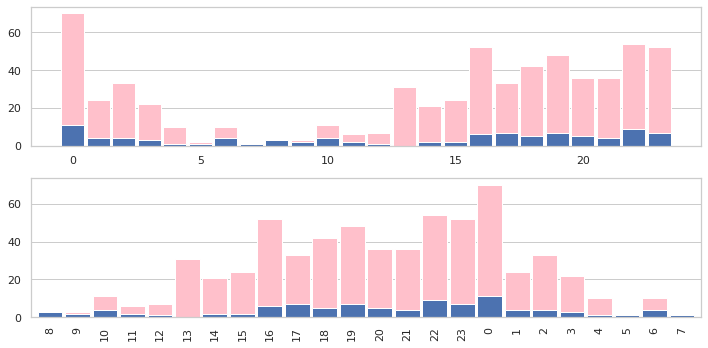

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
crime[shooting]['HOUR'].hist(bins=np.arange(25)-0.5, rwidth=.9, color='pink')
crime[homicide]['HOUR'].hist(bins=np.arange(25)-0.5, rwidth=.9)
plt.grid(axis='x')

plt.subplot(2,1,2)
hours = (list(range(8,24)) + list(range(0,8)))
crime[shooting]['HOUR'].value_counts().reindex(hours, fill_value=0).plot.bar(color='pink', width=.9).grid(axis='x')
crime[homicide]['HOUR'].value_counts().reindex(hours, fill_value=0).plot.bar(color='b', width=.9).grid(axis='x')

plt.tight_layout()
plt.show()

## Hour of the Day

When we begin to examine the hours of the day that shootings take place, it becomes a bit more clear that the day of the week that the shootings take place is not quite as telling as we may originally have thought. If we look at _FIGURE 5.1_ , it would appear that the mean hour of daily shootings would fall somewhere between 1 PM and 8 PM (as the boxplots in _FIGURE 4.2_ would attest). This sort of distribution could make it seem that early AM shootings are outside of the bulk of most daily shootings. However, if we consider that the beginning and ending hour of a particular day is arbitrary and that, perhaps, the daily human behavior we wish to observe doesn't necessarily begin and end at those same hours, we can choose to observe gun violence behavior at different times, like from 8 AM until 8 AM the next day. If we do that, we can see that gun violence seems to have a multi-modal, natural distribution, one of the modes being the suspicious midnight hour we discussed previously.

Combining this information with the daily distribution information, we can deduce that gun activity is most prevalent during the afternoon and nighttime hours, of around 4 PM to about 2 AM, and from Friday night into Saturday morning, Saturday night into Sunday morning, and Sunday night into Monday morning. So how could all the information we've gathered from this data, and summarized in the previous plots and charts, be used to curb gun violence?

Based on the analysis of this report, one might recommend that law enforcement provide extra patrols in the Dudley/Brunswick King neighborhood, 1.8 miles north and south and one mile east and west of the intersection at Intervale St. and Coleus Park, between the hours of 4 PM and 2 AM, Friday night through Monday morning...perhaps between the months of May and October? This is just one example of how this analysis could help target anti-gun violence measures in the city of Boston.

## Future Work

This report is simply the tip of the iceberg. The geographical crime data contained in this report can be combined with with geographical data for:

- zoning maps, waterways, railways, and highways
- airports, bus stops, schools, housing developments, and office buildings
- churches, banks, and retail/shopping spaces
- weather data and moon phase (night lighting/visibility)
- population and employment rates

The data in this data set could serve as a complement to data sets like those mentioned above, the parameters therein, and to what extent gun violence, and overall crime, migrate in response to changes in those parameters.

I've also experimented with creating a sort of crime 'wind plot' which would indicate in which direction crime, or gun violence specifically, is migrating from year to year, for every square mile of the city. Each square mile would have the crime/gun violence trend indicated by a vector that indicates direction, and perhaps the magnitude of the vector used to indicate the distance in which that crime migrated. I'll also have to find a way to plot the data points a little bit more accurately upon the map, although at this point I'm not sure if I might have to find some way to account for the curvature of the earth.

See 'Future Work" code cells below.

In [12]:
#######################
##### FUTURE WORK #####
#######################


#grid_2016 = []
trend_grid = []
for lat in range(3,-8,-1):
    for long in range(-7,5,1):
        trend_grid.append([long+.5, lat-.5])
        #grid_2016.append(crime[['long','lat']][crime.year==2016][crime.lat > lat & crime.lat < lat+1 & crime.long >??? & crime.long < long-1???])
trend_grid = pd.DataFrame(trend_grid, columns=('Long','Lat'))
trend_grid.head()

,Long,Lat
0,-6.5,2.5
1,-5.5,2.5
2,-4.5,2.5
3,-3.5,2.5
4,-2.5,2.5


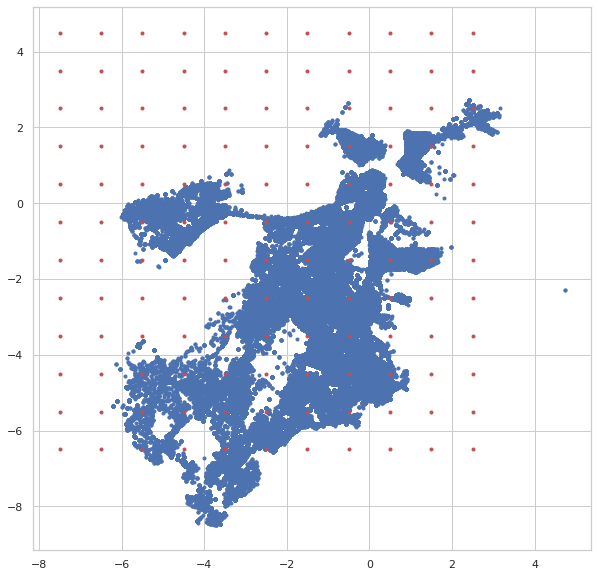

In [13]:
######################
#### FUTURE WORK #####
######################


plt.figure(figsize=(10, 10))

# Plot crime coordinates converting geographic coordinatess to miles ('* 60')
plt.scatter(x=crime['Centered_Long']*51.12, y=crime['Centered_Lat']*69, marker='.')
plt.scatter(x=trend_grid['Lat'], y=trend_grid['Long'], marker='.', color='r')
plt.show()